In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def read(name):
    data = pd.read_csv("E:\\XAI\\datasets\\rt\\"+name)
    return data

kl = read("summary-kl.csv")
tn = read("summary-tn.csv")
mh = read("summary-mh.csv")

kl.head()

,t_start,t_end,Mean(R),Std(R),Quantile.0.025(R),Quantile.0.05(R),Quantile.0.25(R),Median(R),Quantile.0.75(R),Quantile.0.95(R),Quantile.0.975(R)
0,2,8,1.065254,0.753248,0.129007,0.189275,2.526709,0.893933,2.526709,2.526709,2.967607
1,3,9,0.503214,0.503214,0.012740,0.025812,1.507495,0.348801,1.507495,1.507495,1.856296
2,4,10,0.517752,0.517752,0.013108,0.026557,1.551046,0.358878,1.551046,1.551046,1.909924
3,5,11,0.600186,0.600186,0.015195,0.030786,1.797997,0.416017,1.797997,1.797997,2.214014
4,6,12,0.766755,0.766755,0.019413,0.039329,2.296994,0.531474,2.296994,2.296994,2.828468


In [3]:
tntrim=pd.read_csv(r"../../datasets/processed/tn.csv")
mhtrim=pd.read_csv(r"../../datasets/processed/mh.csv")
kltrim=pd.read_csv(r"../../datasets/processed/kl.csv")

tntrim.head()

,Date,State,Confirmed,New Cases,T,H
0,08/03/2020,Tamil Nadu,1,0,28.60,70.0
1,09/03/2020,Tamil Nadu,1,0,27.87,77.0
2,10/03/2020,Tamil Nadu,1,0,27.87,72.0
3,11/03/2020,Tamil Nadu,1,0,28.13,74.0
4,12/03/2020,Tamil Nadu,1,0,27.87,76.0


In [4]:
def merge(dest,sour):
    dest = dest.iloc[7:]
    dest["Rt"] = list(sour["Mean(R)"])
    return dest

tnfinal=merge(tntrim,tn)
mhfinal=merge(mhtrim,mh)
klfinal=merge(kltrim,kl)

tnfinal.head()

C:\Users\suvan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,State,Confirmed,New Cases,T,H,Rt
7,15/03/2020,Tamil Nadu,1,0,28.73,77.0,5.0
8,16/03/2020,Tamil Nadu,1,0,29.33,74.0,5.0
9,17/03/2020,Tamil Nadu,1,0,29.27,78.0,5.0
10,18/03/2020,Tamil Nadu,1,0,28.67,77.0,5.0
11,19/03/2020,Tamil Nadu,2,1,29.27,72.0,10.0


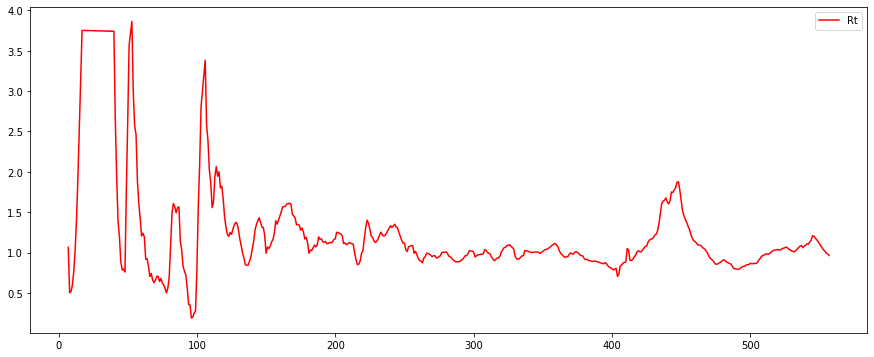

In [5]:
plt.figure(figsize=(15,6))
x=klfinal[klfinal["Rt"]<4]["Rt"]
plt.plot(x,label="Rt",color="red")
plt.legend(loc="best")
plt.show()

In [6]:
from datetime import datetime, timedelta

def date_range(start, end):
    delta = end - start  # as timedelta
    days = [start + timedelta(days=i) for i in range(delta.days + 1)]
    if len(days)==0:
        return 0 
    return len(days)-1

def add_date(df,date,cname):
    diff=[]
    #date = (d,m,y)
    for i in range(len(df)):
        date1 = df.iloc[i,0].split("/")
        d2,m2,y2 = map(int,date1)
        d1,m1,y1 = date
        start_date = datetime(y1, m1, d1)
        end_date = datetime(y2, m2, d2)
        diff.append(date_range(start_date, end_date))
    df[cname]=diff
    return df

In [6]:
# tntrial = add_date(tnfinal,(5,5,2020),"trial")

In [7]:
# tntrial.head()

In [7]:
kldates = {"TJ":(21,3,2020),"DI":(14,11,2020),"SL":(17,6,2020),"GA":(15,3,2020),"MT":(13,4,2020)}
tndates = {"TJ":(21,3,2020),"DI":(14,11,2020),"SL":(30,6,2020),"GA":(15,3,2020),"MT":(14,4,2020)}
mhdates = {"TJ":(21,3,2020),"DI":(14,11,2020),"SL":(7,10,2020),"GA":(15,3,2020),"MT":(11,4,2020)}

#TJ - Tablighi Jamat

#tntrial = add_date(tnfinal,(5,5,2020),"trial")

def final_date(dic,df):
    for i in dic:
        df=add_date(df,dic[i],i)
    return df

kl = final_date(kldates,klfinal)
tn = final_date(tndates,tnfinal)
mh = final_date(mhdates,mhfinal)

C:\Users\suvan\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# kl.to_csv("../../datasets/final/klfinal.csv",index=False)
# tn.to_csv("../../datasets/final/tnfinal.csv",index=False)
# mh.to_csv("../../datasets/final/mhfinal.csv",index=False)

In [9]:
kl.tail()

,Date,State,Confirmed,New Cases,T,H,Rt,TJ,DI,SL,GA,MT
553,07/08/2021,Kerala,3513551,19948,26.33,93.0,1.032794,504,266,416,510,481
554,08/08/2021,Kerala,3533918,20367,27.00,91.0,1.017124,505,267,417,511,482
555,09/08/2021,Kerala,3552525,18607,27.33,89.0,0.993540,506,268,418,512,483
556,10/08/2021,Kerala,3565574,13049,26.67,89.0,0.982611,507,269,419,513,484
557,11/08/2021,Kerala,3586693,21119,27.00,89.0,0.964293,508,270,420,514,485
